In [1]:
import pandas as pd

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt  # これを呼ばないと matplotlib.font_manager にアクセスできない
import numpy as np

In [3]:
plt.rcParams['font.family'] = 'Noto Sans CJK JP'

import shutil
from pathlib import Path

config_dir = Path(mpl.get_configdir())
config_dir.mkdir(exist_ok=True, parents=True)

default_config_path = Path(mpl.__file__).parent / "mpl-data/matplotlibrc"
config_path = config_dir / "matplotlibrc"
shutil.copyfile(default_config_path, config_path)

PosixPath('/home/xiangze/.config/matplotlib/matplotlibrc')

# ステージ数のポイント(票)への影響

In [67]:
music_points_ratio=pd.read_csv("data/music_points_ratio.csv")
music_title=pd.read_csv("data/music_title.csv")

In [68]:
music_title

,Unnamed: 0,Number,Track Name,Notes,title
0,1,01,赤より紅い夢,タイトル画面テーマ,東方紅魔郷 ～ the Embodiment of Scarlet Devil.
1,2,02,ほおずきみたいに紅い魂,１面テーマ,東方紅魔郷 ～ the Embodiment of Scarlet Devil.
2,3,03,妖魔夜行,１面ボス・ルーミアのテーマ,東方紅魔郷 ～ the Embodiment of Scarlet Devil.
3,4,04,ルーネイトエルフ,２面テーマ,東方紅魔郷 ～ the Embodiment of Scarlet Devil.
4,5,05,おてんば恋娘,２面ボス・チルノのテーマ,東方紅魔郷 ～ the Embodiment of Scarlet Devil.
...,...,...,...,...,...
459,5,-,Inventive City,秋霜玉プロトタイプBGM,メニュー
460,6,-,夢幻回廊,オリジナル,メニュー
461,7,-,蓬莱幻想 ～ far East,秋霜玉エキストラステージテーマ（未使用）,メニュー
462,8,-,魔法少女十字軍 ～ Little Little Crusader,秋霜玉５面ボステーマ,メニュー


In [69]:
#全角半角を揃える
music_title=music_title.drop("Unnamed: 0",axis=1)
music_title=music_title.replace("　～ "," 〜 ",regex=True)
music_title=music_title.replace("　〜 "," 〜 ",regex=True)
music_title.columns=['Number', '名前', 'Notes', 'title']

In [70]:
music_title=music_title.replace("ボス.*","ボステーマ",regex=True)
music_title

,Number,名前,Notes,title
0,01,赤より紅い夢,タイトル画面テーマ,東方紅魔郷 〜 the Embodiment of Scarlet Devil.
1,02,ほおずきみたいに紅い魂,１面テーマ,東方紅魔郷 〜 the Embodiment of Scarlet Devil.
2,03,妖魔夜行,１面ボステーマ,東方紅魔郷 〜 the Embodiment of Scarlet Devil.
3,04,ルーネイトエルフ,２面テーマ,東方紅魔郷 〜 the Embodiment of Scarlet Devil.
4,05,おてんば恋娘,２面ボステーマ,東方紅魔郷 〜 the Embodiment of Scarlet Devil.
...,...,...,...,...
459,-,Inventive City,秋霜玉プロトタイプBGM,メニュー
460,-,夢幻回廊,オリジナル,メニュー
461,-,蓬莱幻想 〜 far East,秋霜玉エキストラステージテーマ（未使用）,メニュー
462,-,魔法少女十字軍 〜 Little Little Crusader,秋霜玉５面ボステーマ,メニュー


In [74]:
music_title["Notes"]

0                 タイトル画面テーマ
1                     １面テーマ
2                   １面ボステーマ
3                     ２面テーマ
4                   ２面ボステーマ
               ...         
459            秋霜玉プロトタイプBGM
460                   オリジナル
461    秋霜玉エキストラステージテーマ（未使用）
462              秋霜玉５面ボステーマ
463            秋霜玉プロトタイプBGM
Name: Notes, Length: 464, dtype: object

In [75]:
music_title.groupby(["Notes"]).count()

,Number,名前,title
Notes,,,
3面ボステーマ,1,1,1
EXTRAのテーマ,1,1,1
EXTRAステージテーマ,12,12,12
EXTRAステージボステーマ,10,10,10
EXTRAボステーマ,3,3,3
...,...,...,...
６面Aボステーマ,1,1,1
６面Bボステーマ,1,1,1
６面テーマ,12,12,12


In [76]:
def stage_neyose(p:pd.DataFrame)-> pd.DataFrame:
    p["stage"]=p.index.values
    p=p.replace("ボス.*","ボステーマ",regex=True)
    p=p.replace("取材のテーマ.","取材のテーマ",regex=True)
    p=p.replace("魔界.*","魔界",regex=True)
    p=p.replace("vs.*","vs",regex=True)
    p=p.replace("会話.*","会話",regex=True)
    p=p.replace(".*エンディングテーマ","エンディングテーマ",regex=True)
    p=p.replace("撮影曲.","撮影曲",regex=True)

    p=p.replace("未使用曲.*","未使用曲",regex=True)
    p=p.replace("１面のテーマ","１面テーマ",regex=True)
    p=p.replace("２面のテーマ","２面テーマ",regex=True)
    p=p.replace("３面のテーマ","３面テーマ",regex=True)
    p=p.replace("3面ボステーマ","３面テーマ",regex=True)
    p=p.replace("６面.*テーマ","６面テーマ",regex=True)

    p=p.replace("１、２面ボステーマ","１面ボステーマ",regex=True)

    p=p.replace("１０面テーマ","１０面以上テーマ",regex=True)
    p=p.replace("１５面テーマ","１０面以上テーマ",regex=True)
    p=p.replace("１６～１９面テーマ","１０面以上テーマ",regex=True)
    p=p.replace(".*地獄.*","地獄",regex=True)

    p=p.replace("EXTRAのテーマ""最終面テーマ",regex=True)
    p=p.replace("EXTRAステージテーマ""最終面テーマ",regex=True)
    p=p.replace("PHANTASMステージテーマ""最終面テーマ",regex=True)

    p=p.replace("EXTRAステージボステーマ","最終面ボステーマ",regex=True)
    p=p.replace("EXTRAボステーマ","最終面ボステーマ",regex=True)
    p=p.replace("PHANTASMステージボステーマ","最終面ボステーマ",regex=True)
    p=p.replace("エキストラボステーマ","最終面ボステーマ",regex=True)
    p=p.replace("最終ボステーマ","最終面ボステーマ",regex=True)

    p=p.replace(".*エンディングテーマ","エンディングテーマ",regex=True)
    p=p.replace("エキストラステージテーマ","エキストラステージ",regex=True)

    p=p.replace("グッドエンド.*","グッドエンド",regex=True)
    p=p.replace("ゲームオーバーテーマ.*","ゲームオーバーテーマ",regex=True)
    p=p.replace("バッドエンド.*テーマ","ゲームオーバーテーマ",regex=True)

    p=p.replace("スタッフロール.*","スタッフロール",regex=True)
    p=p.replace("タイトル.*","タイトル",regex=True)
    p=p.replace("ネームレジスト.*","ネームレジスト",regex=True)
    #p=p.replace(".+のテーマ","対戦のテーマ",regex=True)
    p=p.replace(".*のテーマ","キャラ特定のテーマ",regex=True)
    return p

In [77]:
stage_neyose(music_title).groupby(["Notes"]).count()

,Number,名前,title,stage
Notes,,,,
EXTRAステージテーマ,12,12,12,12
PHANTASMステージテーマ,1,1,1,1
SPOILER クリア,1,1,1,1
vs,9,9,9,9
エキストラステージ,4,4,4,4
エンディングテーマ,21,21,21,21
オリジナル,3,3,3,3
キャラクターセレクト,1,1,1,1
キャラ特定のテーマ,63,63,63,63


In [78]:
music_points_ratio_subtitle=pd.merge(music_points_ratio,stage_neyose(music_title),on="名前",how="outer")

In [84]:
music_points_ratio_stage=music_points_ratio_subtitle.groupby(["Notes"]).sum()

<AxesSubplot:xlabel='Notes'>

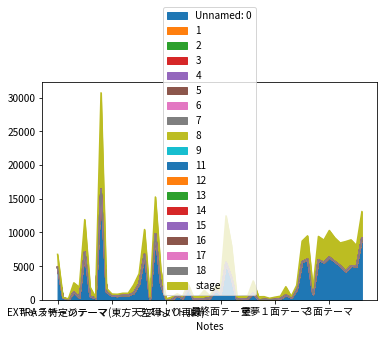

In [85]:
music_points_ratio_stage.plot.area()

In [91]:
music_points_ratio_stageT=music_points_ratio_stage.T.drop("stage")
music_points_ratio_stageT=music_points_ratio_stageT.drop("Unnamed: 0")
music_points_ratio_stageT

Notes,EXTRAステージテーマ,PHANTASMステージテーマ,SPOILER クリア,vs,エキストラステージ,エンディングテーマ,オリジナル,キャラクターセレクト,キャラ特定のテーマ,キャラ特定のテーマ(旧約酒場より再録),...,１０面以上テーマ,２面テーマ,２面ボステーマ,３面テーマ,３面ボステーマ,４面テーマ,４面ボステーマ,５面テーマ,５面ボステーマ,６面テーマ
1,0.032448,0.000000,0.0,0.154867,0.013274,0.007375,0.001475,0.000000,0.008850,0.000000,...,0.000000,0.035398,0.072271,0.079646,0.132743,0.010324,0.016224,0.022124,0.073746,0.119469
2,0.026400,0.000000,0.0,0.076468,0.005462,0.004096,0.000000,0.000000,0.120847,0.000000,...,0.000000,0.017296,0.038462,0.047110,0.070323,0.024807,0.141784,0.025034,0.053254,0.217569
3,0.010596,0.000000,0.0,0.042733,0.002779,0.001621,0.000347,0.000000,0.105153,0.000000,...,0.000058,0.013781,0.036885,0.029415,0.069369,0.018703,0.167169,0.066705,0.046323,0.227446
4,0.005388,0.000000,0.0,0.017390,0.003147,0.004214,0.000640,0.003841,0.039475,0.000000,...,0.000160,0.010082,0.024912,0.006828,0.035314,0.014563,0.000000,0.010829,0.004854,0.075216
5,0.011414,0.001429,0.0,0.072022,0.003629,0.002257,0.000132,0.002557,0.131314,0.000000,...,0.000075,0.024709,0.036180,0.060739,0.045526,0.024803,0.057862,0.028847,0.051751,0.175956
6,0.021816,0.001916,0.0,0.081648,0.004144,0.001885,0.000226,0.001682,0.133809,0.000000,...,0.000164,0.020874,0.039691,0.056670,0.047324,0.023366,0.078058,0.032323,0.058758,0.172853
7,0.028447,0.001774,0.0,0.086174,0.004705,0.001722,0.000172,0.002587,0.108559,0.000000,...,0.000193,0.019489,0.039709,0.051953,0.038014,0.030038,0.070582,0.027628,0.055286,0.183418
8,0.031208,0.001643,0.0,0.080352,0.004838,0.001988,0.000200,0.002745,0.125343,0.000000,...,0.000245,0.020089,0.036131,0.054833,0.039733,0.029014,0.066188,0.027712,0.052194,0.176946
9,0.035947,0.001523,0.0,0.071302,0.004819,0.001751,0.000188,0.001845,0.113206,0.000000,...,0.000309,0.020661,0.031768,0.057861,0.040954,0.041944,0.069721,0.028660,0.050055,0.174086
11,0.039493,0.001703,0.0,0.051950,0.004774,0.002344,0.000454,0.001703,0.121083,0.000000,...,0.000348,0.017990,0.023641,0.057526,0.033842,0.038361,0.053281,0.028036,0.049980,0.168085


<AxesSubplot:>

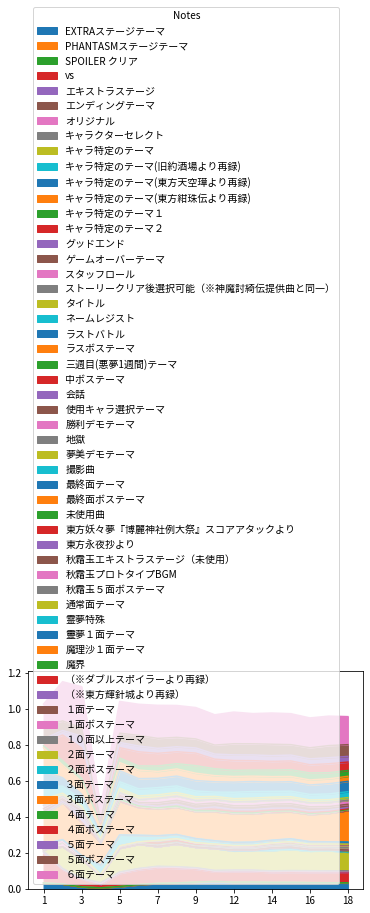

In [92]:
music_points_ratio_stageT.plot.area()

In [42]:
music_points_ratio_subtitle.groupby(["Notes"]).count().to_csv("data/music_points_ratio_subtitle_count.csv")